<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

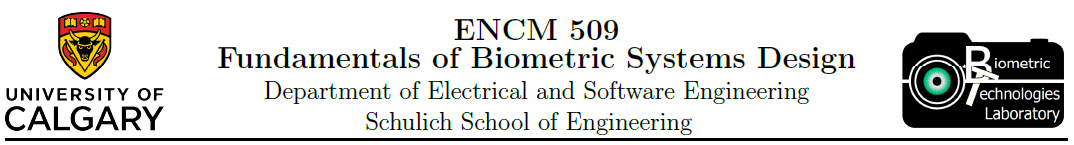

# ENCM 509 - Lab 2 Report

**Student Names**


**Mushtaba Al Yasseen (30094000)**
\
**Usman Khan (30092202)**

Importing all necessary libraries

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.patches import Rectangle
import matplotlib as mpl

from scipy import ndimage as ndi

from sklearn.feature_extraction.image import extract_patches_2d

from skimage.io import imread, imsave
from skimage.util import img_as_ubyte, invert
from skimage.exposure import equalize_hist, equalize_adapthist
from skimage.filters import median, gaussian
from skimage.filters import gabor_kernel
from skimage.util import invert
from skimage.exposure import equalize_adapthist

# custom functions
from utils_encm.blockproc import blockproc
from utils_encm.poincare import calculate_singularities
from utils_encm.segmentation import segmentation
from utils_encm.normalization import normalize
from utils_encm.gabor_filter import gabor_filter
from utils_encm.frequency import ridge_freq
from utils_encm.orientation import calculate_angles, visualize_angles
from utils_encm.crossing_number import calculate_minutiae
from utils_encm.skeletonize import skeletonize
from utils_encm.align2 import align2
from utils_encm.MatchGaborFeat import MatchGaborFeat
from utils_encm.align2 import align2
from utils_encm.match import match

# setting the default colormap for images only
mpl.rc('image', cmap='gray')

# **Introduction:**

## **Exercise 1:**

Loading the fingerprint image

In [2]:
left_thumb1_good = img_as_ubyte(imread('./fingerPrints/MushtabaLeft/5.bmp', as_gray=True))

Auxiliary method

In [3]:
def plot_gabor_filter(img, angle, freq):
    r, c = img.shape
    ysize = int(np.floor(r/10))

    t = int(np.floor(ysize/8))
    fi = np.real(gabor_kernel(freq, theta=angle, n_stds=t))

    # 'mode' specifies how the convolution algorithm will deal with the borders
    If1 = equalize_adapthist(ndi.convolve(img, fi, mode='wrap'))
    # normalize
    If1 = ((If1 - np.min(If1)) / (np.max(If1) - np.min(If1))) * 255
    #print(np.min(If1), np.max(If1))

    plt.figure(figsize=(12,12))
    plt.subplot(1,3,1)
    plt.imshow(img, cmap='gray'); plt.title('Original image')
    plt.subplot(1,3,2)
    plt.imshow(fi, cmap='gray'); plt.title('Filter used')
    plt.subplot(1,3,3)
    plt.imshow(If1, cmap='gray'); plt.title('Image processed');

Below we will perform Gabor filtering on our fingerprint image while adjusting the _frequency_ and _angle_ parameters to see how it affects the fingerprint image.

#### Set #1 Baseline - Frequency (0.11), Angle ($\pi/4, 45^{\circ }$)

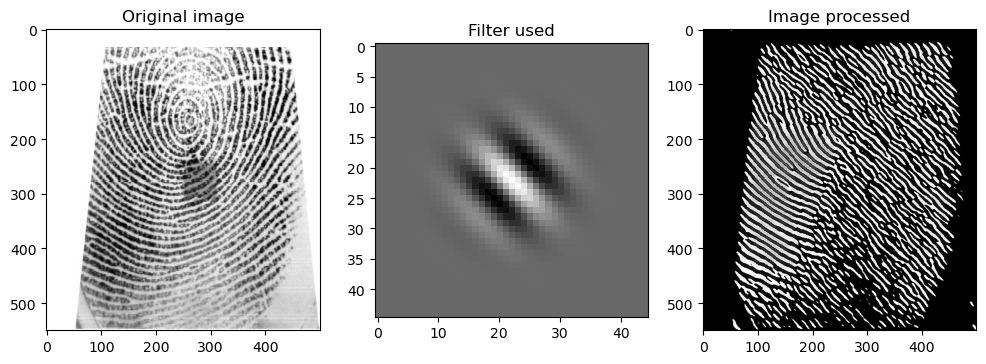

In [4]:
plot_gabor_filter(left_thumb1_good, angle=-np.pi/4, freq=0.11)

#### Set #2 - Frequency (0.11), Angle ($\pi/2, 90^{\circ }$)

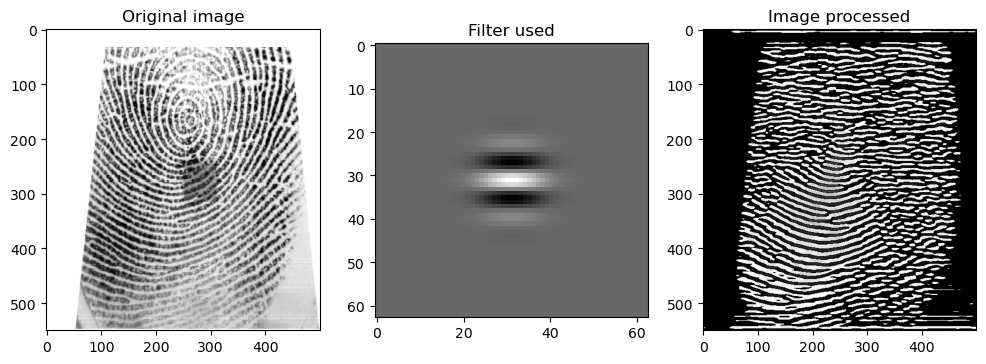

In [5]:
plot_gabor_filter(left_thumb1_good, angle=-np.pi/2, freq=0.11)

#### Set #3 - Frequency (0.80), Angle ($\pi/4, 45^{\circ }$)

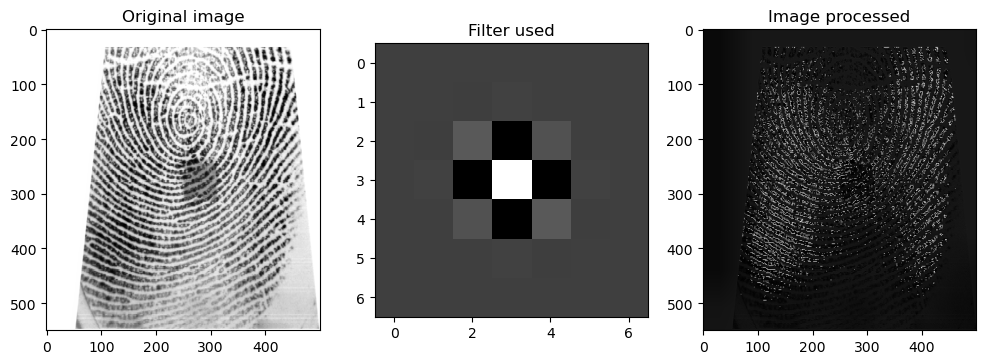

In [8]:
plot_gabor_filter(left_thumb1_good, angle=-np.pi/4, freq=0.80)

#### Set #4 - Frequency (0.80), Angle ($\pi/2, 90^{\circ }$)

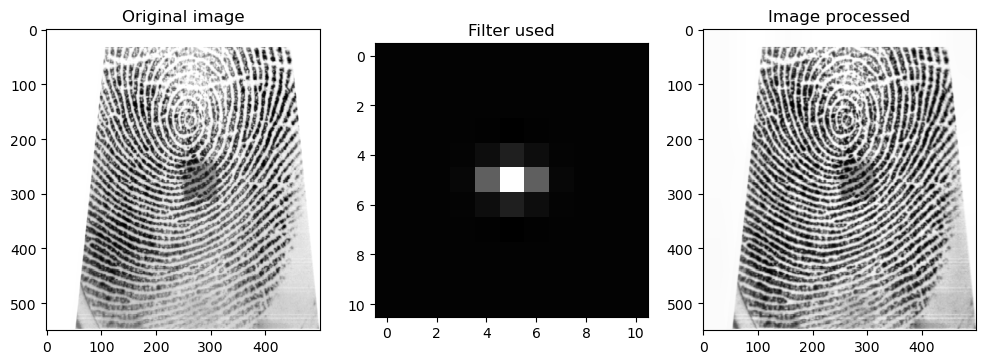

In [29]:
plot_gabor_filter(left_thumb1_good, angle=-np.pi/2, freq=0.80)

#### Analysis Of Data:

## **Exercise 2:**

#### Analysis Of Data:

## **Exercise 3:**

#### Analysis Of Data:

## **Exercise 4:**

#### Analysis Of Data:

# **Conclusion:**